In [57]:
import math
import time
import RSA_Code
import matplotlib.pyplot as plt
from IPython.core.debugger import set_trace
import os, sys
import numpy as np
import random

**Original Code**

In [2]:
def factoring_algorithm(N, e):
    flag = True
    while flag:
        if math.gcd(N, e) != 1:
            print("e must be co-prime to N")
            continue
        if N > e > 1:
            for r in range(1, N):
                while N > 1:
                    print(r)
                    break
                if pow(e, r, N) == 1:
                    while N > 1:
                        print("f(r) = ", pow(e, r, N))
                        break
                    break
            print("a = ", e)
            print("r = ", r)
            if r % 2 == 0 and pow(e, r // 2, N) != N - 1:
                p = math.gcd(e ** (r // 2) - 1, N)
                q = math.gcd(e ** (r // 2) + 1, N)
                flag = False
            else:
                print("Error")
    print("p: ", p)
    print("q: ", q)

In [ ]:
sample_time = []
t_all = time.time()

for b in range(5, 6):
    
    p, q, n, phi_n, e, d = RSA_Code.key_generation(b)
        
    sys.stdout = open(os.devnull, "w") # <---- 
    
    t_start = time.time()
    factoring_algorithm(n, e)
    sample_time.append(time.time() - t_start)

    sys.stdout = sys.__stdout__ # <-----
    
print(time.time() - t_all)

**Modified**

In [3]:
def shor(n):
    if n <= 2:
        raise ValueError("n has to be greater than 2.")
    
    for a in range(2, n):
        
        if math.gcd(a, n) != 1:
            # Then we already find the factor
            p = math.gcd(a, n)
            q = n // p
            
            if p > q:
                p, q = q, p
            
            return p, q
        
        else:
            
            r = 2
            
            while r < n:
                # Check if r satisfies 
                if pow(a, r, n) == 1:
                    if math.gcd(n, pow(a, r//2) - 1) == 1 and math.gcd(n, pow(a, r//2) + 1) == 1:
                        p = math.gcd(pow(a, r//2) - 1, n)
                        q = math.gcd(pow(a, r//2) + 1, n)
                        
                        if p > q:
                            p, q = q, p
                        
                        return p, q

                # If not, find next r
                r += 2
    
    # If every a is tried, then there is no factors for n.
    # Return (1, n)
    return 1, n

In [25]:
sample_time = []
bit_lengths = []

In [ ]:
%pdb
t_all = time.time()
for n_sample in range(0, 1000):
    
    sys.stdout.flush()
    
    b = random.randint(5,10)
    
    p, q, n, phi_n, e, d = RSA_Code.key_generation(b)
    
    print(str(n.bit_length()) + " bits")

    
    if p > q:
        p, q = q, p
    
    t_start = time.time()
    p_, q_ = shor(n)
    if p == p_ and q == q_:
        sample_time.append(time.time() - t_start)
        bit_lengths.append(n.bit_length())
        
        dat = np.asarray([bit_lengths, sample_time])
        np.savetxt('shor_data.csv', dat, delimiter=',')
        
    else:
        set_trace()
    
print(time.time() - t_all)

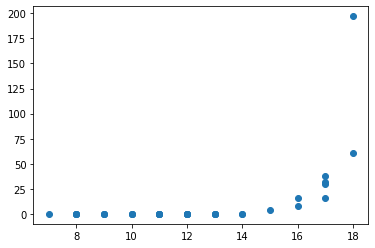

In [55]:
plt.plot(bit_lengths,sample_time,'o')

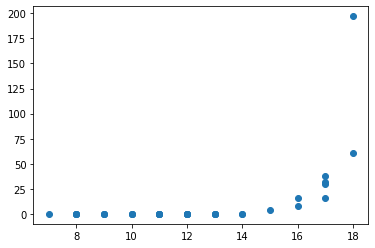

In [56]:
dat = np.loadtxt('shor_data.csv', delimiter=',')

plt.plot(dat[0], dat[1], 'o')